In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [330]:
def cos_theta(r, theta):
    if(isinstance(theta, list)):
        return [r * np.cos(theta[i]) for i in range(0, len(theta))]
    elif(isinstance(theta, float) or isinstancen(theta, int)):
        return r * np.cos(theta)    

In [331]:
def sin_theta(r, theta):
    if(isinstance(theta, list)):
        return [r * np.sin(theta[i]) for i in range(0, len(theta))]
    elif(isinstance(theta, float) or isinstancen(theta, int)):
        return r * np.sin(theta)

In [351]:
def spider_vizu(dataset, columns, features_number, ax):
    max_features_size = 10

    card = [((2*np.pi)/features_number) * i  for i in range(1, features_number+1)]

    r_ext = max_features_size+0.1*max_features_size
    card_ext_x = cos_theta(r_ext, card)
    card_ext_x.append(card_ext_x[0])
    card_ext_y = sin_theta(r_ext, card)
    card_ext_y.append(card_ext_y[0])

    r_mi = max_features_size
    card_mi_x = cos_theta(r_mi, card)
    card_mi_x.append(card_mi_x[0])
    card_mi_y = sin_theta(r_mi, card)
    card_mi_y.append(card_mi_y[0])

    dataset_x = []
    dataset_y = []
    for i in range(0, features_number):
        dataset_x.append(cos_theta(dataset[i], card[i]))
        dataset_y.append(sin_theta(dataset[i], card[i]))
        
    ax.plot(card_ext_x, card_ext_y, color='black', alpha=0.8)
    ax.plot(card_mi_x, card_mi_y, color='black', alpha=0.4)

    for i in range(0, features_number):
        x_grid = [0, card_ext_x[i]]
        y_grid = [0, card_ext_y[i]]
        ax.plot(x_grid, y_grid, color='black', alpha=0.4)
        ax.scatter(dataset_x[i], dataset_y[i], color='black', s=100)
        ax.text(dataset_x[i], dataset_y[i], '%.3f'%dataset[i], fontsize=30) 
        ax.text(card_ext_x[i], card_ext_y[i], columns[i], fontsize=30)

    ax.fill(dataset_x, dataset_y, color='red', alpha=0.4)

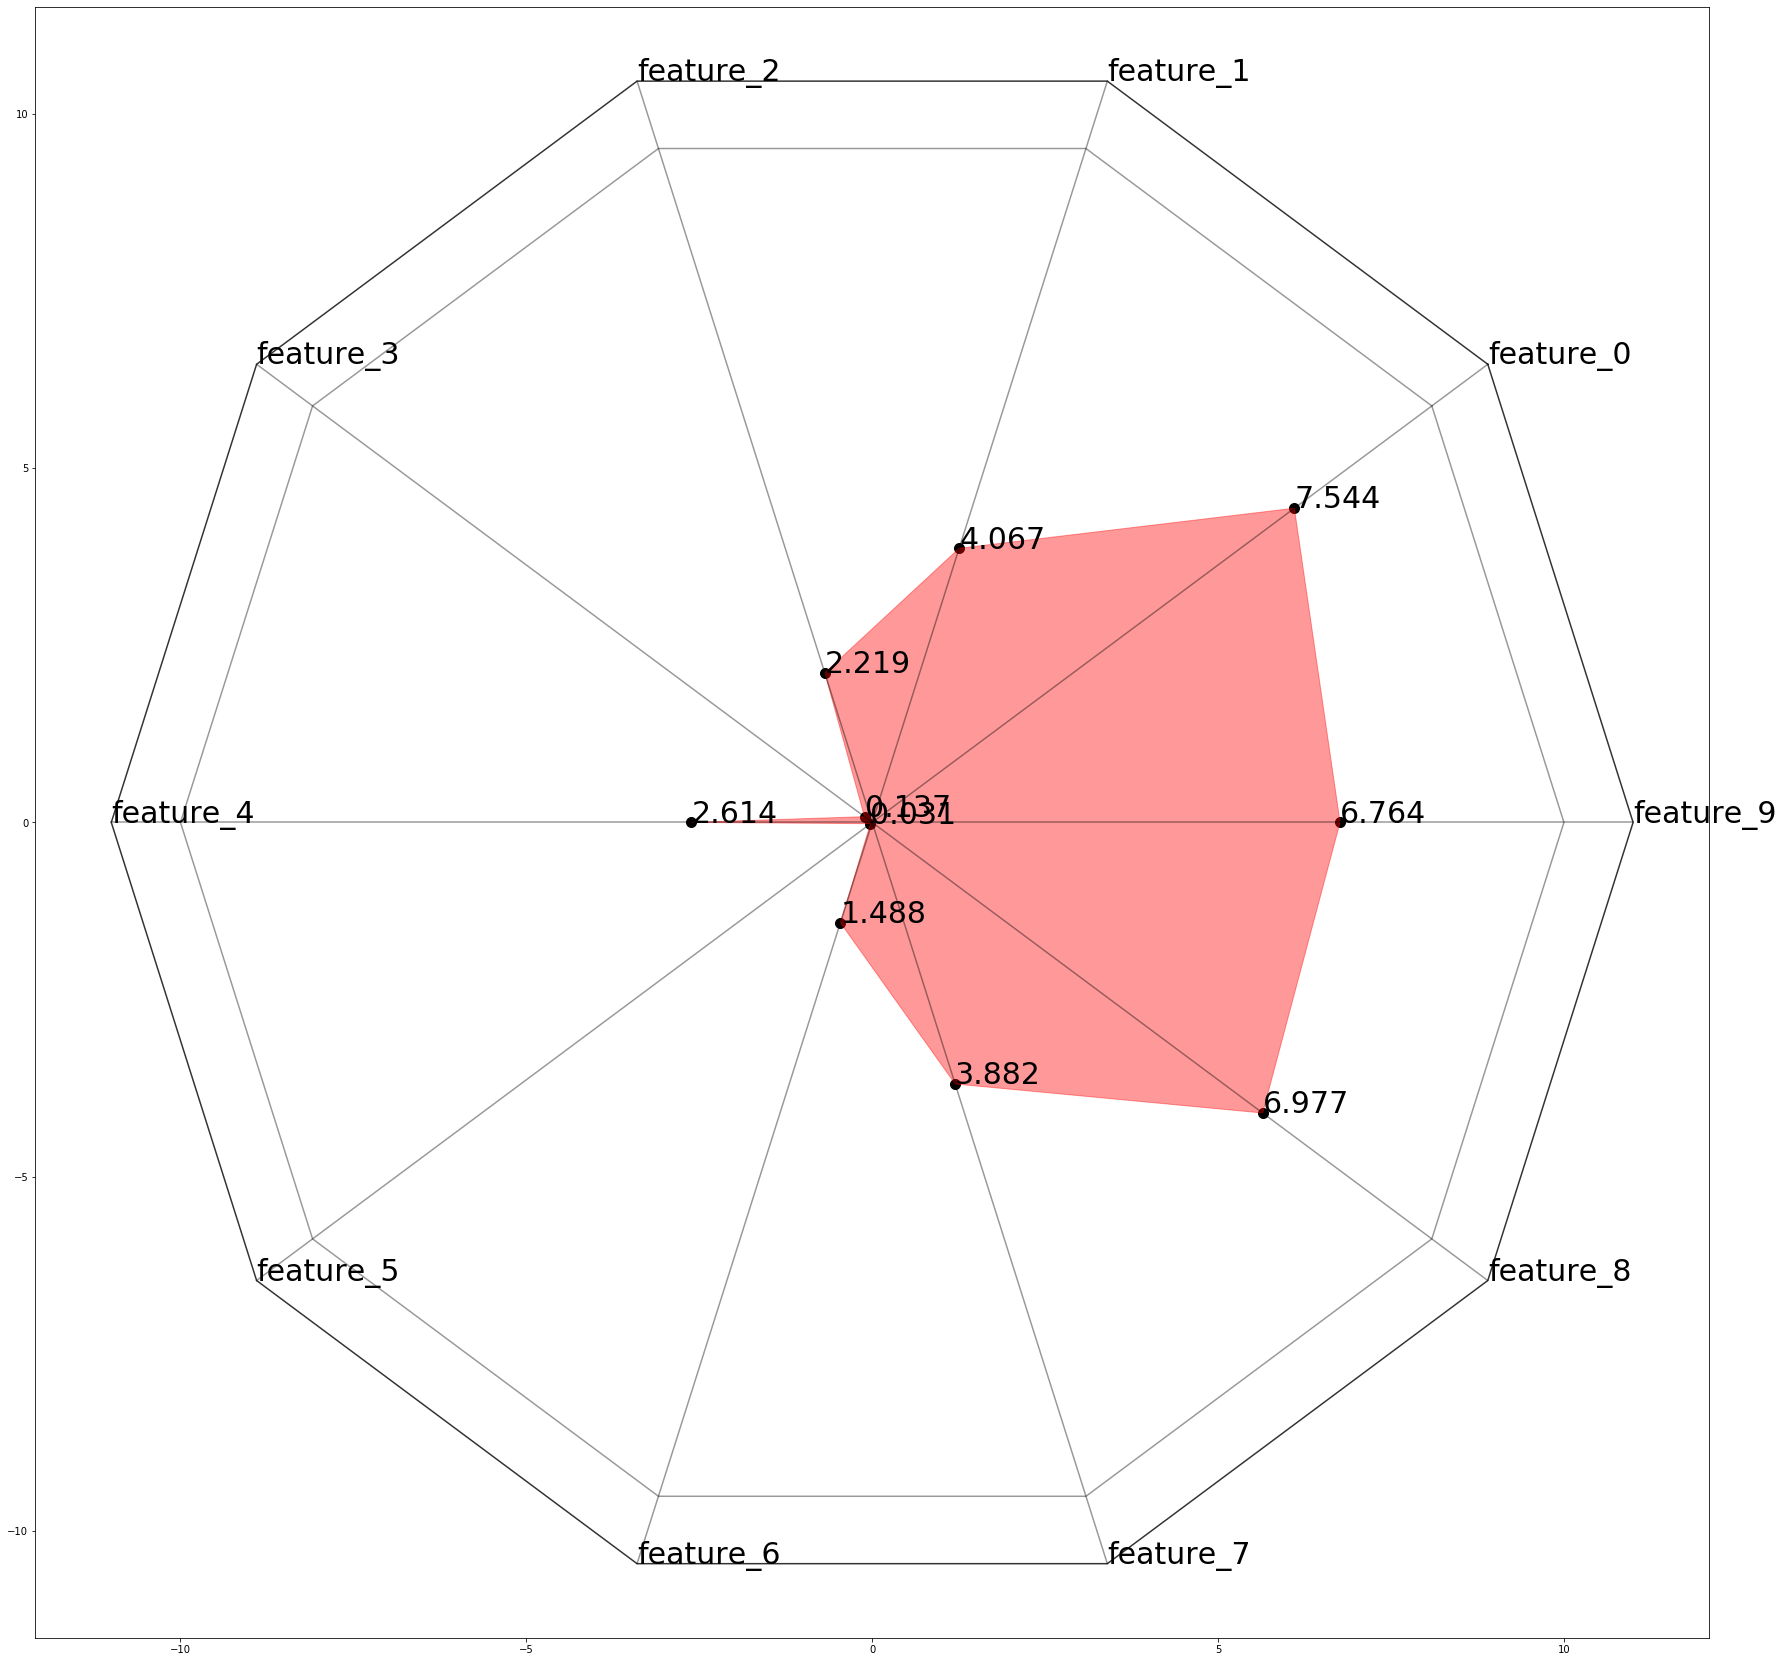

In [356]:
features_number = 10
max_value = 10
dataset = np.random.uniform(0, max_value, features_number)
columns = ['feature_{indice}'.format(indice=i) for i in range(0, features_number)]
figure = plt.figure(figsize=(30, 30))
ax = plt.subplot(1, 1, 1)
spider_vizu(dataset, columns, features_number, ax)